In [64]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
import  pandas as pd
import imutils

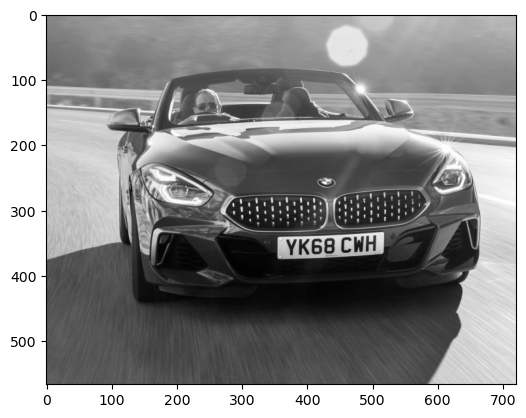

In [65]:
image = cv2.imread("new.jpg")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

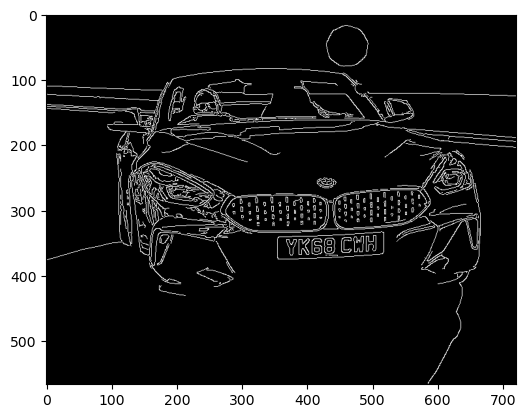

In [66]:
b_filter=cv2.bilateralFilter(gray,11,17,17)
edage=cv2.Canny(b_filter,50,200)
plt.imshow(cv2.cvtColor(edage,cv2.COLOR_BGR2RGB))

In [67]:
point_of_contours = cv2.findContours(edage.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
grab_point=imutils.grab_contours(point_of_contours)
contours=sorted(grab_point,key=cv2.contourArea,reverse=True)[:10]
len(contours)

10

In [68]:
location=None
for contour in contours:
    approx=cv2.approxPolyDP(contour,10,True)
    if len(approx)==4:
        location=approx
        break
len(location)    

4

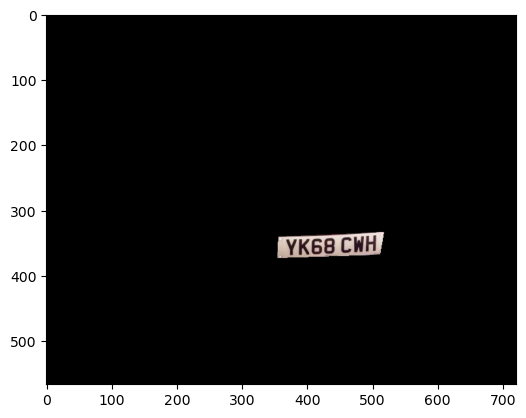

In [69]:
mask=np.zeros(gray.shape,np.uint8)
new_image=cv2.drawContours(mask,[location],-1,255,-1)
new_image=cv2.bitwise_and(image,image,mask=mask)
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

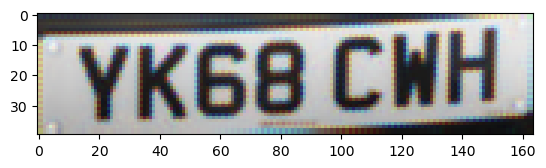

In [70]:
(x,y)=np.where(mask==255)
(x1,y1)=(x.min(),y.min())
(x2,y2)=(x.max(),y.max())
cropped_image=gray[x1:x2+1,y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BAYER_BG2BGR))

In [71]:
reader=easyocr.Reader(['en'])
result=reader.readtext(cropped_image)
result


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[11, 1], [159, 1], [159, 40], [11, 40]], 'YK6B CWH', 0.27214408152283637)]

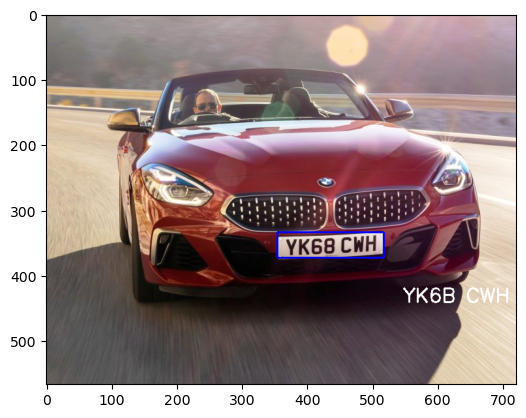

In [72]:
text=result[0][-2]
font=cv2.FONT_HERSHEY_SIMPLEX
res=cv2.putText(image,text=text,fontFace=font,org=(approx[0][0][0]+30,approx[1][0][1]+100),color=(255,255,255),fontScale=1,thickness=2)
res=cv2.rectangle(image,tuple(approx[0][0]),tuple(approx[2][0]),(255,0,0),2)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))